<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week10/pca_to_speed_up_ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [44]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRGP5J9COwLh0tEphaZ2MsHVo3Ue9JKXOwb9SiXfhlHYsdUxl_O4LeymwgaxVSq6Qa5ubWpZCo15Nce/pub?output=csv'
df = pd.read_csv(url, index_col = 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


In [46]:
# Encode the diagnosis column
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace = True)

In [47]:
# Set the target and features
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [48]:
# Scale the data
scaled_df = StandardScaler().fit_transform(df)

In [49]:
# Apply PCA to the data
pca = PCA()
pca.fit(scaled_df)

PCA()

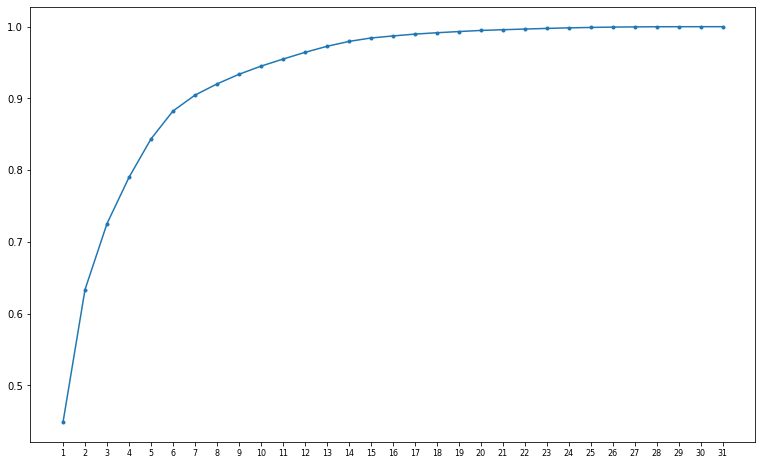

In [50]:
# Plot the cumulative sum of the explained variance for each component
plt.figure(figsize = (13, 8));
plt.plot(range(1, 32), pca.explained_variance_ratio_.cumsum(), marker = '.');
plt.xticks(range(1, 32), fontsize = 8);

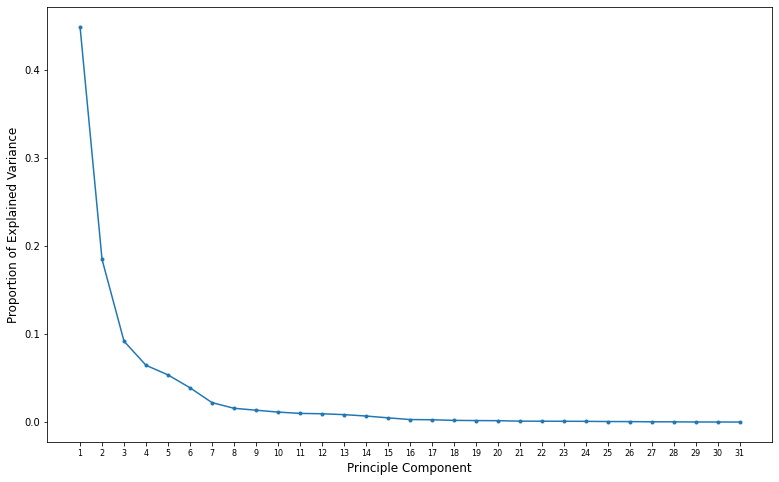

In [51]:
# Plot the explained variance for each component
plt.figure(figsize = (13, 8));
plt.plot(range(1, 32), pca.explained_variance_ratio_, marker = '.');
plt.xticks(range(1, 32), fontsize = 8);
plt.xlabel('Principle Component', fontsize = 12);
plt.ylabel('Proportion of Explained Variance', fontsize = 12);

In [52]:
# PCA with 7 components
pca7 = PCA(n_components = 7)

In [53]:
# PCA with enough componennts to explain 85% of the variance
pca85 = PCA(n_components = 0.85)

In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [55]:
# Build a PCA pipeline. Seven components were chosen 
# based on the above graphs.
transformer = make_pipeline(StandardScaler(), PCA(n_components = 7))

In [56]:
# Build a logistic regression model
logreg_pipe = make_pipeline(transformer, LogisticRegression())
# Train the model
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [57]:
print('Training Accuracy', logreg_pipe.score(X_train, y_train))
print('Testing Accuracy', logreg_pipe.score(X_test, y_test))

Training Accuracy 0.9741784037558685
Testing Accuracy 0.986013986013986
